The algorithm approximate ratio is 3/2 theoretically, 
It can be found in the documentation of networkx.algorithms.approximation.traveling_salesman

In [9]:
import itertools
import networkx as nx

def tsp_brute_force(graph):
    # Get a list of all possible routes
    routes = list(itertools.permutations(graph.nodes()))

    # Initialize variables to track the optimal route and distance
    shortest_distance = float("inf")
    shortest_route = None

    # Iterate over all routes
    for route in routes:
        # Calculate the total distance for this route
        distance = sum(graph[route[i]][route[i + 1]]["weight"] for i in range(len(route) - 1))

        # Update the optimal route and distance if necessary
        if distance < shortest_distance:
            shortest_distance = distance
            shortest_route = route

    # Return the optimal route and distance
    return shortest_route, shortest_distance


Made a brute force algorithm to compare to the approximate algorithm of networkX 

0.0012121200561523438
The route of the traveller with approx is: [0, 3, 1, 2, 0]
The route of the traveller with *no* approx is: (0, 2, 1, 3)
0.00026988983154296875


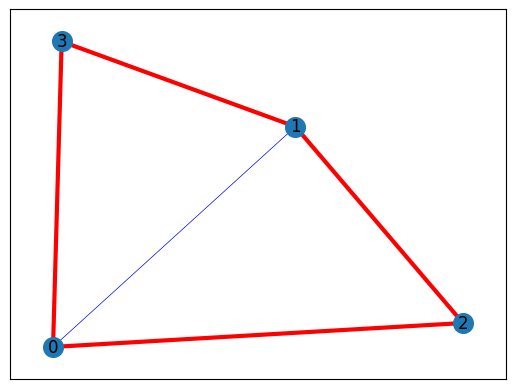

In [33]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.approximation as nx_app
import math
import time

G = nx.random_geometric_graph(4, radius=0.4, seed=3)
pos = nx.get_node_attributes(G, "pos")

# Depot should be at (0,0)
pos[0] = (0, 0)

H = G.copy()


# Calculating the distances between the nodes as edge's weight.
for i in range(len(pos)):
    for j in range(i + 1, len(pos)):
        dist = math.hypot(pos[i][0] - pos[j][0], pos[i][1] - pos[j][1])
        dist = dist
        G.add_edge(i, j, weight=dist)

start_time = time.time()
cycle = nx_app.christofides(G, weight="weight")
print(time.time() - start_time)
edge_list = list(nx.utils.pairwise(cycle))

# Draw closest edges on each node only
nx.draw_networkx_edges(H, pos, edge_color="blue", width=0.5)

# Draw the route
nx.draw_networkx(
    G,
    pos,
    with_labels=True,
    edgelist=edge_list,
    edge_color="red",
    node_size=200,
    width=3,
)

print("The route of the traveller with approx is:", cycle)
start_time = time.time()
print("The route of the traveller with *no* approx is:", tsp_brute_force(G)[0])
print(time.time() - start_time)
plt.show()

for 2 nodes we cannot see the ratio but then when we up to 3 nodes

0.00144195556640625
The route of the traveller with approx is: [0, 4, 2, 5, 3, 1, 0]
The route of the traveller with *no* approx is: (3, 1, 4, 0, 2, 5)
0.0036482810974121094


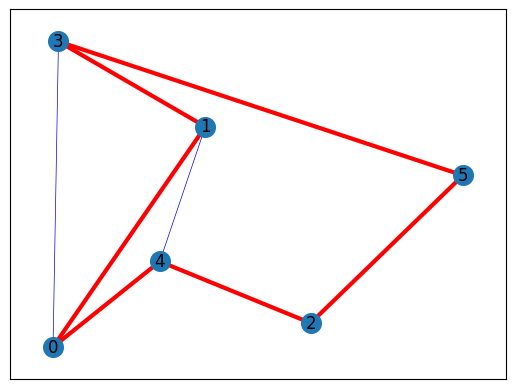

In [31]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.approximation as nx_app
import math
import time

G = nx.random_geometric_graph(6, radius=0.4, seed=3)
pos = nx.get_node_attributes(G, "pos")

# Depot should be at (0,0)
pos[0] = (0, 0)

H = G.copy()


# Calculating the distances between the nodes as edge's weight.
for i in range(len(pos)):
    for j in range(i + 1, len(pos)):
        dist = math.hypot(pos[i][0] - pos[j][0], pos[i][1] - pos[j][1])
        dist = dist
        G.add_edge(i, j, weight=dist)

start_time = time.time()
cycle = nx_app.christofides(G, weight="weight")
print(time.time() - start_time)
edge_list = list(nx.utils.pairwise(cycle))

# Draw closest edges on each node only
nx.draw_networkx_edges(H, pos, edge_color="blue", width=0.5)

# Draw the route
nx.draw_networkx(
    G,
    pos,
    with_labels=True,
    edgelist=edge_list,
    edge_color="red",
    node_size=200,
    width=3,
)

print("The route of the traveller with approx is:", cycle)
start_time = time.time()
print("The route of the traveller with *no* approx is:", tsp_brute_force(G)[0])
print(time.time() - start_time)
plt.show()

only when we go up to 6 we can assure the ratio approximation

0.0019791126251220703
The route of the traveller with approx is: [0, 4, 7, 2, 6, 5, 8, 9, 1, 3, 0]
The route of the traveller with *no* approx is: (0, 4, 2, 7, 6, 5, 8, 9, 1, 3)
25.91086769104004


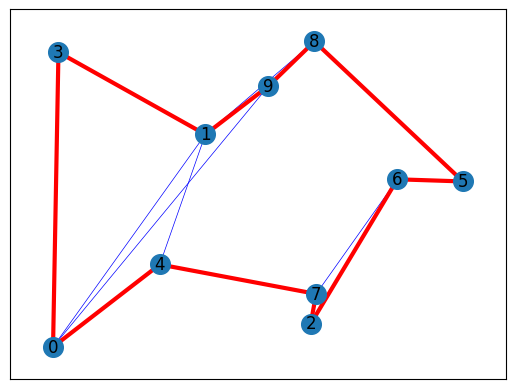

In [34]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.approximation as nx_app
import math
import time

G = nx.random_geometric_graph(10, radius=0.4, seed=3)
pos = nx.get_node_attributes(G, "pos")

# Depot should be at (0,0)
pos[0] = (0, 0)

H = G.copy()


# Calculating the distances between the nodes as edge's weight.
for i in range(len(pos)):
    for j in range(i + 1, len(pos)):
        dist = math.hypot(pos[i][0] - pos[j][0], pos[i][1] - pos[j][1])
        dist = dist
        G.add_edge(i, j, weight=dist)

start_time = time.time()
cycle = nx_app.christofides(G, weight="weight")
print(time.time() - start_time)
edge_list = list(nx.utils.pairwise(cycle))

# Draw closest edges on each node only
nx.draw_networkx_edges(H, pos, edge_color="blue", width=0.5)

# Draw the route
nx.draw_networkx(
    G,
    pos,
    with_labels=True,
    edgelist=edge_list,
    edge_color="red",
    node_size=200,
    width=3,
)

print("The route of the traveller with approx is:", cycle)
start_time = time.time()
print("The route of the traveller with *no* approx is:", tsp_brute_force(G)[0])
print(time.time() - start_time)
plt.show()

And for 10 we see that the ratio is much bigger then the theoretically one. 